# Blog-get started (Django)

## Intro

`Django` is a high-level `Python` web framework that encourages rapid development and clean, pragmatic design. In this tutorial, we'll cover the basics of `Django`, including setting up a project, creating applications, handling databases, and more.

Tools Needed

- Python (version 3.6 or higher)
- Django (latest version)
- Text editor or IDE (VS Code, PyCharm, etc.)


## Setting Up Django

### Step 1: Install Django

```bash
pip install django
```

### Step 2: Create a Django Project

```bash
django-admin startproject django_project
cd django_project
```

### Step 3: Run the Development Server

- Visit `http://127.0.0.1:8000/` to see your project running.

```bash
python manage.py runserver
```


### Check the project structure using `tree`

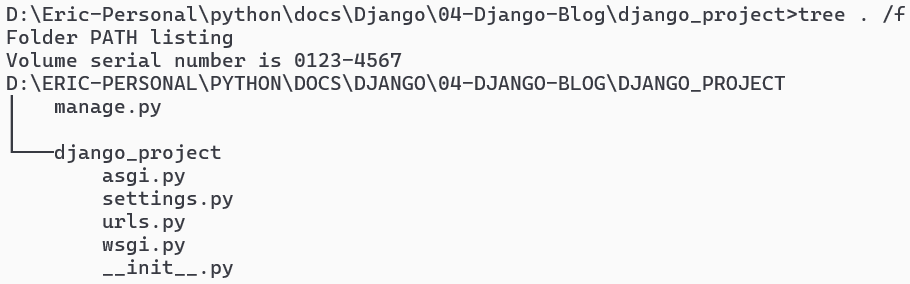

## Creating a Django Application

- [Reference](https://www.youtube.com/watch?v=a48xeeo5Vnk&list=PL-osiE80TeTtoQCKZ03TU5fNfx2UY6U4p&index=2&ab_channel=CoreySchafer)


### Start an App

```bash
python manage.py startapp blog
```

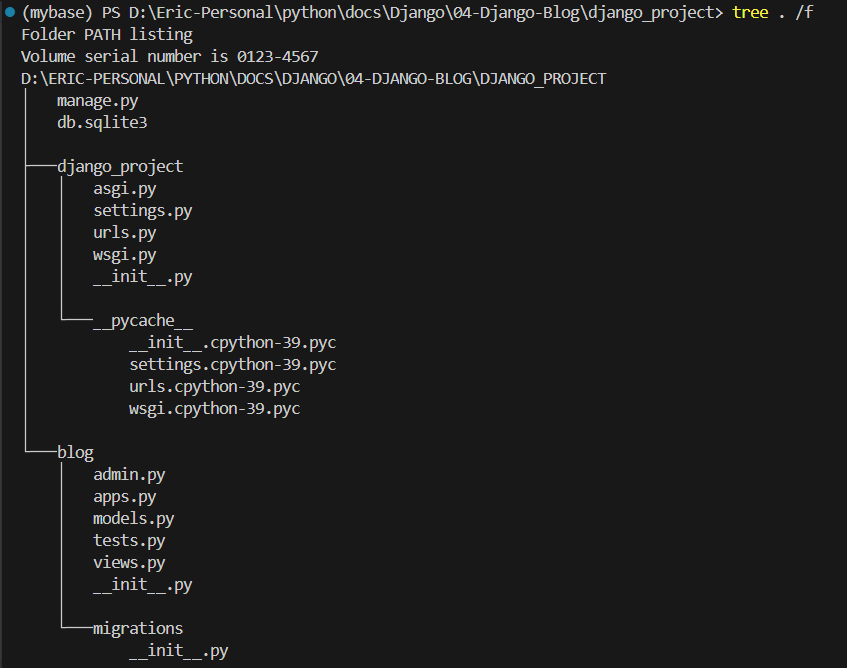

### Register the App
* It's important for Django to search `templates` and register database [`Models`]
* Add `blog.apps.BlogConfig` to the `INSTALLED_APPS` list in `django_project/settings.py`:

    ```python
    INSTALLED_APPS = [
        "blog.apps.BlogConfig",
        ...
    ]
    ```

### Creating new table [Model] in Database

1. Construct database schema at `blog/models.py`

    ```python
    from django.db import models

    class Post(models.Model):
        title = models.CharField(max_length=50)
        content = models.TextField()
        date_posted = models.DateTimeField(auto_now_add=True)

        def __str__(self):
            return self.title
    ```

2. Register `Models` in `Admin` using `blog/admin.py`


    ```python
    from django.contrib import admin
    from .models import Post

    admin.site.register(Post)
    ```
    
3. Sync the database modification (Make Migrations)

    ```bash
    python manage.py makemigrations
    python manage.py migrate
    ```

### Creating Views

* In `blog/views.py`

    ```python
    from django.shortcuts import render
    from .models import Post

    def home(request):
        context = {
            'posts': Post.objects.all()
        }
        return render(request, 'blog/home.html', context)
    ```

* Create a `templates/blog` directory under `blog` and add `base.html`
  * In this tutorial, we use `bootstrap@5.0`

    ```html
    <!DOCTYPE html>
    <html lang="en">

    <head>
        <!-- Required meta tags -->
        <meta charset="utf-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1" />

        <!-- Bootstrap CSS -->
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/css/bootstrap.min.css" rel="stylesheet"
            integrity="sha384-EVSTQN3/azprG1Anm3QDgpJLIm9Nao0Yz1ztcQTwFspd3yD65VohhpuuCOmLASjC" crossorigin="anonymous" />

        {% if title %}
        <title>Django Blog - {{title}}</title>
        {% else %}
        <title>Django Blog</title>
        {% endif %}

    </head>

    <body>
        <div class="container">
            {% block blog-content%} {% endblock %}
        </div>

        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/js/bootstrap.bundle.min.js"
            integrity="sha384-MrcW6ZMFYlzcLA8Nl+NtUVF0sA7MsXsP1UyJoMp4YLEuNSfAP+JcXn/tWtIaxVXM"
            crossorigin="anonymous"></script>
    </body>

    </html>
    ```

* Extend (inherent) `base.html` to `home.html` and replace `blog-content`

    ```html
    {% extends 'blog/base.html' %}

    {% block blog-content%}

    {% if posts %} {% for post in posts %}
    <div>
        <h2>{{ post.title }}</h2>
        <p>By {{ post.author }} on {{ post.date_posted }}</p>
        <p>{{ post.content }}</p>
    </div>
    {% endfor %} {% endif %}

    {% endblock blog-content%}
    ```

### Configuring URLs

1. In `blog/urls.py`:

    ```python
    from django.urls import path
    from . import views

    urlpatterns = [
        path('', views.home, name='blog-home'),
    ]
    ```

2. In `django_project/urls.py`

    ```python
    from django.contrib import admin
    from django.urls import include, path

    urlpatterns = [
        path('admin/', admin.site.urls),
        path('', include('blog.urls')),
    ]
    ```

## Creating views using templates

- In Django, `templates` are used to generate `HTML` dynamically.
- The `template` system allows you to use `inheritance` and `includes` to manage common layouts and components.

### Template Inheritance and Structure

- Django templates support `inheritance`, allowing you to **define a base template and extend it in other templates**.

    <table>
    <tr>
        <th>Template</th>
        <th>Extends</th>
        <th>Blocks Defined</th>
        <th>Blocks Filled</th>
    </tr>
    <tr>
        <td>base.html</td>
        <td>-</td>
        <td>extra_styles, main</td>
        <td>-</td>
    </tr>
    <tr>
        <td>navigation.html</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>main.html</td>
        <td>base.html</td>
        <td>blog-content</td>
        <td>extra_styles, main</td>
    </tr>
    <tr>
        <td>home.html</td>
        <td>main.html</td>
        <td>-</td>
        <td>blog-content</td>
    </tr>
    </table>

### Base Template (`base.html`)

- The base template defines the common structure of your web pages.
- Key points
  - **Inheritance**: Defines a base layout with `head` and `body` sections.
  - **Blocks**: Defines `extra_styles` and `main` blocks that **child templates can override**.
  - **Conditional Rendering**: Uses `{% if title %}` to conditionally set the page title.
  - **Include**: Includes a separate `navigation.html` template.

    ```html
    <!DOCTYPE html>
    <html lang="en">

    <head>
        <!-- Required meta tags -->
        <meta charset="utf-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1" />

        <!-- Bootstrap CSS -->
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/css/bootstrap.min.css" rel="stylesheet" />

        {% if title %}
        <title>Django Blog - {{title}}</title>
        {% else %}
        <title>Django Blog</title>
        {% endif %}

        {% block extra_styles %}
        {% endblock %}
    </head>

    <body>
        {% include 'blog/navigation.html' %}

        {% block main %}
        {% endblock %}

        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/js/bootstrap.bundle.min.js"></script>
    </body>

    </html>
    ```

### Navigation Template (`navigation.html`)

- The navigation bar included in the base template.
- **Bootstrap Navbar**: Uses `Bootstrap` classes for responsive navigation.
- **Links**: Provides links for navigation, including Django's `{% url %}` template tag for **dynamic URL handling**.

  ```html
  <header class="site-header">
    <nav class="navbar navbar-expand-md navbar-dark bg-steel fixed-top">
      <div class="container">
        <a class="navbar-brand mr-4" href="{% url 'blog-home' %}">Django Blog</a>
        <button
          class="navbar-toggler"
          type="button"
          data-toggle="collapse"
          data-target="#navbarToggle"
          aria-controls="navbarToggle"
          aria-expanded="false"
          aria-label="Toggle navigation"
        >
          <span class="navbar-toggler-icon"></span>
        </button>
        <div class="collapse navbar-collapse" id="navbarToggle">
          <div class="navbar-nav mr-auto">
            <a class="nav-item nav-link" href="{% url 'blog-home' %}">Home</a>
            <a class="nav-item nav-link" href="{% url 'blog-about' %}">About</a>
          </div>
          <!-- Navbar Right Side -->
          <div class="navbar-nav">
            <a class="nav-item nav-link" href="#">Login</a>
            <a class="nav-item nav-link" href="#">Register</a>
          </div>
        </div>
      </div>
    </nav>
  </header>
  ```


### Main Template (`main.html`)

- Extends the base template and adds extra styles and a main content area.
- Key points
  - **Extends Base Template**: Inherits the structure from `base.html`.
  - **Static Files**: Loads static CSS file with `{% load static %}` and `{% static 'blog/main.css' %}`.
  - **Blocks**: Adds `blog-content` block inside the `main` block.

    ```html
    {% extends 'blog/base.html' %}

    {% load static %}

    {% block extra_styles %}
    <link rel="stylesheet" type="text/css" href="{% static 'blog/main.css' %}">
    {% endblock %}

    {% block main %}
    <main role="main" class="container">
        <div class="row">
            <div class="col-md-8">
                {% block blog-content %}
                {% endblock %}
            </div>
            <div class="col-md-4">
                <div class="content-section">
                    <h3>Sidebar</h3>
                    <p class='text-muted'>You can put any information here you'd like.
                    <ul class="list-group">
                        <li class="list-group-item list-group-item-light">Latest Posts</li>
                        <li class="list-group-item list-group-item-light">Announcements</li>
                        <li class="list-group-item list-group-item-light">Calendars</li>
                        <li class="list-group-item list-group-item-light">etc</li>
                    </ul>
                    </p>
                </div>
            </div>
        </div>
    </main>
    {% endblock %}

    ```


### Home Template (`home.html`)
* Extends the `main` template and provides content for the `blog-content` block.

    ```html
    {% extends 'blog/main.html' %}

    {% block blog-content%}

    {% if posts %} {% for post in posts %}
    <div>
        <article class="media content-section">
            <div class="media-body">
                <div class="article-metadata">
                    <a class="mr-2" href="#">{{ post.author }}</a>
                    <small class="text-muted">{{ post.date_posted }}</small>
                </div>
                <h2><a class="article-title" href="#">{{ post.title }}</a></h2>
                <p class="article-content">{{ post.content }}</p>
            </div>
        </article>
    </div>
    {% endfor %} {% endif %}

    {% endblock blog-content%}

    ```

## Django Admin

Django's `admin` interface is a powerful tool for managing application data. 

* It provides a web-based interface for `CRUD` (**Create, Read, Update, Delete**) operations. 

### Enable the Admin Interface

* Ensure the following in your `django_project/settings.py`:
  * `django.contrib.admin`: Enables the admin site.
  * `django.contrib.auth`: Provides authentication framework.
  * `django.contrib.contenttypes`: Provides content type framework.
  * `django.contrib.sessions`: Manages user sessions.
  * `django.contrib.messages`: Provides messaging framework.
  * `django.contrib.staticfiles`: Manages static files.

    ```python
    INSTALLED_APPS = [
        ...
        'django.contrib.admin',
        'django.contrib.auth',
        'django.contrib.contenttypes',
        'django.contrib.sessions',
        'django.contrib.messages',
        'django.contrib.staticfiles',
        ...
    ]

    ```

### Create a Superuser
* To access the admin site, create a superuser:
```bash
python manage.py createsuperuser
```
* Follow the prompts to set a username, email, and password.

### Add Models to the Admin

* To manage your models in the `admin` interface, register them in `admin.py`.
* Example (`blog/admin.py`)
  * `admin.site.register(Model)`: Registers the model with the admin interface.

    ```python
    from django.contrib import admin
    from .models import Post, Comment

    admin.site.register(Post)
    ```